In [1]:
# Experiment Parameter Settings
n_mac = 1024
iter = 100000

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Generate a random input column of ndarray with specified probability of '1's and '0's
def gen_col(n_mac, sparsity):
    ones_cnt = int(n_mac * sparsity)
    zeros_cnt = n_mac - ones_cnt
    input_col = np.concatenate((np.ones(ones_cnt), np.zeros(zeros_cnt)))
    np.random.shuffle(input_col)

    return input_col

# Calculate real MAC value in a CiM AND compute with random weight and activation column
def calc_mac(n_mac, p_w, p_x):
    col_w = gen_col(n_mac, p_w)
    col_x = gen_col(n_mac, p_x)
    col_mac = col_w * col_x
    mac_out = sum(col_mac)

    return mac_out

# Iterate experiment to extract real MAC output distribution with specified sparsity of weight and activations
# n_mac = MAC column length
# p_w = Weight sparsity
# p_x = Activation sparsity
# iter = Experiment iteration
def mac_experiment(n_mac, p_w, p_x, iter):
    list = []
    for i in range(iter):
        list.append(calc_mac(n_mac, p_w, p_x))
    
    return list

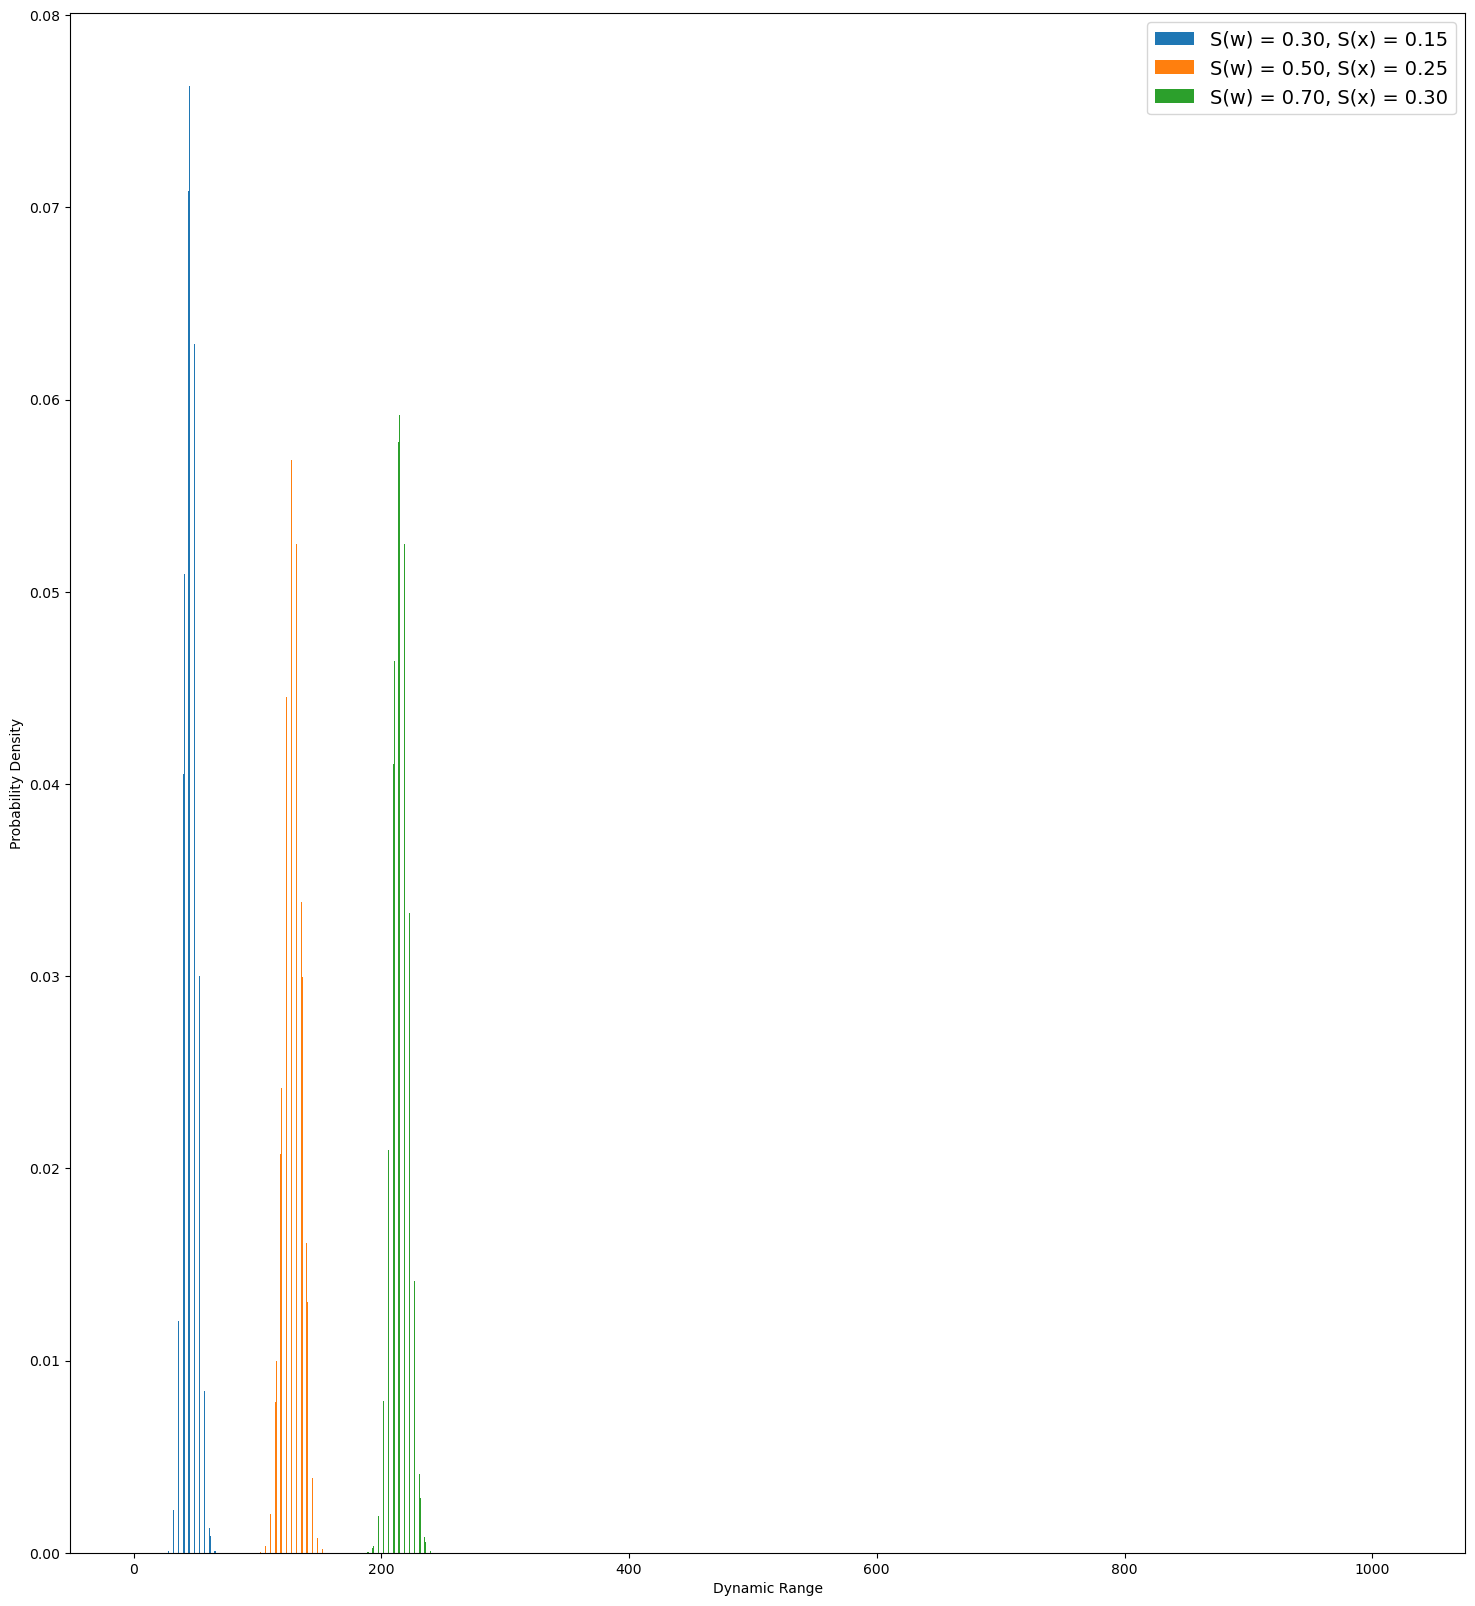

S(w) = 0.30, S(x) = 0.15: Mean = 45.87, Std = 5.23, Maximum = 69.00, Minimum = 24.00.
S(w) = 0.50, S(x) = 0.25: Mean = 127.98, Std = 6.90, Maximum = 157.00, Minimum = 98.00.
S(w) = 0.70, S(x) = 0.30: Mean = 214.66, Std = 6.71, Maximum = 246.00, Minimum = 184.00.


In [4]:
# Experiment SRC
list_w_30_x_15 = mac_experiment(n_mac, 0.3, 0.15, iter)
list_w_50_x_25 = mac_experiment(n_mac, 0.5, 0.25, iter)
list_w_70_x_30 = mac_experiment(n_mac, 0.7, 0.30, iter)

tag_0 = 'S(w) = 0.30, S(x) = 0.15'
tag_1 = 'S(w) = 0.50, S(x) = 0.25'
tag_2 = 'S(w) = 0.70, S(x) = 0.30'

fig = plt.figure(figsize=(18, 20))
fig = plt.hist([list_w_30_x_15, list_w_50_x_25, list_w_70_x_30], bins=n_mac, density=True, range=(0, n_mac), label=[tag_0, tag_1, tag_2])
fig = plt.legend(fontsize=14)
fig = plt.xlabel('Dynamic Range')
fig = plt.ylabel('Probability Density')
plt.show()

print("{}: Mean = {:.2f}, Std = {:.2f}, Maximum = {:.2f}, Minimum = {:.2f}.".format(tag_0, np.mean(list_w_30_x_15), np.std(list_w_30_x_15), np.max(list_w_30_x_15), np.min(list_w_30_x_15)))
print("{}: Mean = {:.2f}, Std = {:.2f}, Maximum = {:.2f}, Minimum = {:.2f}.".format(tag_1, np.mean(list_w_50_x_25), np.std(list_w_50_x_25), np.max(list_w_50_x_25), np.min(list_w_50_x_25)))
print("{}: Mean = {:.2f}, Std = {:.2f}, Maximum = {:.2f}, Minimum = {:.2f}.".format(tag_2, np.mean(list_w_70_x_30), np.std(list_w_70_x_30), np.max(list_w_70_x_30), np.min(list_w_70_x_30)))